# **Preprocessing**

In [61]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('Healthcare Providers.csv')

In [62]:
df

,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3837311,1386938868,PAPES,JOAN,NaN,PT,F,I,324 E BALTIMORE ST,NaN,...,97162,"Evaluation of physical therapy, typically 30 m...",N,20,20,20,85.3725,214,60.7255,62.2485
99996,2079360,1215091327,HAYNER,MARGARET,S,ARNP,F,I,645 NW 4TH ST,NaN,...,99213,Established patient office or other outpatient...,N,136,107,136,61.27,144.05147059,30.006176471,37.040220588
99997,8927965,1902868185,VALENCIA,DANA,NaN,M.D.,M,I,3009 N BALLAS RD,SUITE 202B,...,93320,"Doppler ultrasound study of heart blood flow, ...",N,11,11,11,17.98,109.54545455,14.09,14.62
99998,8854571,1891941183,GONZALEZ-LAMOS,RAFAELA,NaN,NaN,F,I,2365 BOSTON POST RD,SUITE 201,...,G0008,Administration of influenza virus vaccine,N,12,12,12,30.54,65,29.93,25.32


In [63]:
# List of columns to be dropped from the DataFrame
DropCols = [
    'index',                          # index column
    'National Provider Identifier',   # Unique provider identifier, not required for analysis
    'Last Name/Organization Name of the Provider',  # Name or organization details, possibly irrelevant
    'First Name of the Provider',     # Provider's first name
    'Middle Initial of the Provider', # Provider's middle initial
    'Street Address 1 of the Provider', # Street address, not required for the analysis
    'Street Address 2 of the Provider', # Additional street address, not required
    'Zip Code of the Provider',       # Provider's zip code
    'HCPCS Code'                      # Healthcare Common Procedure Coding System code
]

# Drop the specified columns from the DataFrame, ignoring errors if columns are missing
cleaned_df = df.drop(columns=DropCols, errors='ignore')

# Print the shape of the cleaned DataFrame
print("Shape of the DataFrame after dropping specified columns:")
print(cleaned_df.shape)

Shape of the DataFrame after dropping specified columns:
(100000, 18)


In [64]:
# Display the first 5 rows of the DataFrame
cleaned_df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [65]:
# List of columns to be converted to numeric
columns_to_convert = [
    'Number of Services',  # Number of services provided
    'Number of Medicare Beneficiaries',  # Count of Medicare beneficiaries
    'Number of Distinct Medicare Beneficiary/Per Day Services',  # Distinct per-day Medicare services
    'Average Medicare Allowed Amount',  # Average amount allowed by Medicare
    'Average Submitted Charge Amount',  # Average charge amount submitted
    'Average Medicare Payment Amount',  # Average payment made by Medicare
    'Average Medicare Standardized Amount'  # Standardized average payment by Medicare
]

# Iterate through each column in the list and convert it to numeric
# Invalid parsing (e.g., non-numeric strings) will be set to NaN
for column in columns_to_convert:
    cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')

# Display information about the selected columns to verify their data types and changes
print("Data types after conversion:")
print(cleaned_df[columns_to_convert].info())

Data types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Number of Services                                        97347 non-null  float64
 1   Number of Medicare Beneficiaries                          99595 non-null  float64
 2   Number of Distinct Medicare Beneficiary/Per Day Services  98500 non-null  float64
 3   Average Medicare Allowed Amount                           99255 non-null  float64
 4   Average Submitted Charge Amount                           93277 non-null  float64
 5   Average Medicare Payment Amount                           99534 non-null  float64
 6   Average Medicare Standardized Amount                      99530 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB
None


In [66]:
cleaned_df

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,M.D.,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,"Initial hospital inpatient care, typically 70 ...",N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,M.D.,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,"Screening mammography, bilateral (2-view study...",N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,"Established patient home visit, typically 25 m...",N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,"Urinalysis, manual test",N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,Injection beneath the skin or into muscle for ...,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,PT,F,I,WILMINGTON,IL,US,Physical Therapist in Private Practice,Y,O,"Evaluation of physical therapy, typically 30 m...",N,20.0,20.0,20.0,85.372500,214.000000,60.725500,62.248500
99996,ARNP,F,I,REDMOND,OR,US,Nurse Practitioner,Y,O,Established patient office or other outpatient...,N,136.0,107.0,136.0,61.270000,144.051471,30.006176,37.040221
99997,M.D.,M,I,SAINT LOUIS,MO,US,Cardiology,Y,F,"Doppler ultrasound study of heart blood flow, ...",N,11.0,11.0,11.0,17.980000,109.545455,14.090000,14.620000
99998,NaN,F,I,LARCHMONT,NY,US,Internal Medicine,Y,O,Administration of influenza virus vaccine,N,12.0,12.0,12.0,30.540000,65.000000,29.930000,25.320000


### **We have dropped the unnecessary columns from the dataframe.**

In [67]:
# Importing necessary modules for data transformation and preprocessing
from sklearn.compose import ColumnTransformer  # To apply different transformations to different columns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder  # For scaling and encoding
from sklearn.pipeline import make_pipeline  # To create a machine learning pipeline for transformations

In [68]:
import pandas as pd

# Assuming 'cleaned_df' is your DataFrame and 'target_column' is your target variable
nominal_columns = ['Credentials of the Provider','Gender of the Provider','Entity Type of the Provider','City of the Provider','State Code of the Provider',
           'Country Code of the Provider','Provider Type','Medicare Participation Indicator','Place of Service','HCPCS Description','HCPCS Drug Indicator']  # Replace with actual nominal columns

# Check unique values in each nominal column
for col in nominal_columns:
    unique_count = cleaned_df[col].nunique()
    print(f"Column '{col}' has {unique_count} unique values.")
    
    if unique_count > 10:
        print(f"Applying frequency encoding to column: {col}")
        # Apply Frequency Encoding
        freq_map = cleaned_df[col].value_counts().to_dict()
        cleaned_df[col] = cleaned_df[col].map(freq_map)
    else:
        print(f"Applying one-hot encoding to column: {col}")
        # Apply One-Hot Encoding for low-cardinality columns
        one_hot = pd.get_dummies(cleaned_df[col], prefix=col)
        cleaned_df = pd.concat([cleaned_df, one_hot], axis=1)
        cleaned_df.drop(columns=[col], inplace=True)

# Display the updated DataFrame
print(cleaned_df.info())

Column 'Credentials of the Provider' has 1854 unique values.
Applying frequency encoding to column: Credentials of the Provider
Column 'Gender of the Provider' has 2 unique values.
Applying one-hot encoding to column: Gender of the Provider
Column 'Entity Type of the Provider' has 2 unique values.
Applying one-hot encoding to column: Entity Type of the Provider
Column 'City of the Provider' has 5846 unique values.
Applying frequency encoding to column: City of the Provider
Column 'State Code of the Provider' has 58 unique values.
Applying frequency encoding to column: State Code of the Provider
Column 'Country Code of the Provider' has 4 unique values.
Applying one-hot encoding to column: Country Code of the Provider
Column 'Provider Type' has 90 unique values.
Applying frequency encoding to column: Provider Type
Column 'Medicare Participation Indicator' has 2 unique values.
Applying one-hot encoding to column: Medicare Participation Indicator
Column 'Place of Service' has 2 unique val

In [69]:
# Define the list of features for Min-Max scaling and Standard scaling
min_max_features = ['Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services']
standard_features = ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

# Create the transformation pipeline for Min-Max Scaling
min_max_scaler_pipeline = make_pipeline(MinMaxScaler())

# Create the transformation pipeline for Standard Scaling
standard_scaler_pipeline = make_pipeline(StandardScaler())

# Combine both transformations into a single ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('min max', min_max_scaler_pipeline, min_max_features),  # Apply Min-Max Scaling to specified features
    ('standard', standard_scaler_pipeline, standard_features)  # Apply Standard Scaling to specified features
], remainder='passthrough', verbose_feature_names_out=False, force_int_remainder_cols=False)

# Ensure the output of the transformer is in a pandas DataFrame format
preprocessor.set_output(transform='pandas')

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('min max',
                                 Pipeline(steps=[('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Number of Services',
                                  'Number of Medicare Beneficiaries',
                                  'Number of Distinct Medicare Beneficiary/Per '
                                  'Day Services']),
                                ('standard',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Average Medicare Allowed Amount',
                                  'Average Submitted Charge Amount',
                                  'Average Medicare Payment Amount',
                                  'Average Medicare Standardized Amount'])],
                  verbose_feature_names_out=False)

In [70]:
# Apply the transformations defined in 'preprocessor' to the 'cleaned_df' DataFrame
transformed_df = preprocessor.fit_transform(cleaned_df)

# Display the transformed DataFrame
transformed_df

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Credentials of the Provider,City of the Provider,State Code of the Provider,...,Country Code of the Provider_DE,Country Code of the Provider_JP,Country Code of the Provider_TR,Country Code of the Provider_US,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,0.016194,0.013158,0.016194,1.094128,0.599773,0.970184,1.000960,32757.0,500,1997,...,False,False,False,True,False,True,True,False,True,False
1,0.165992,0.165992,0.165992,0.350820,1.874600,0.548672,0.721089,32757.0,209,3725,...,False,False,False,True,False,True,False,True,True,False
2,0.021255,0.002024,0.021255,0.030896,-0.186359,-0.047863,-0.095982,1330.0,10,1403,...,False,False,False,True,False,True,False,True,True,False
3,0.009109,0.007085,0.009109,-0.811950,-0.971386,-0.716998,-0.721103,32874.0,317,1997,...,False,False,False,True,False,True,False,True,True,False
4,0.022267,0.013158,0.020243,-0.589319,-0.788213,-0.540315,-0.550213,2478.0,51,7263,...,False,False,False,True,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.009109,0.009109,0.009109,-0.020144,0.122418,-0.088599,-0.077911,800.0,323,4073,...,False,False,False,True,False,True,False,True,True,False
99996,0.126518,0.097166,0.126518,-0.253244,-0.243658,-0.425519,-0.353569,463.0,14,1046,...,False,False,False,True,False,True,False,True,True,False
99997,0.000000,0.000000,0.000000,-0.671911,-0.424246,-0.600082,-0.598739,32757.0,500,1997,...,False,False,False,True,False,True,True,False,True,False
99998,0.001012,0.001012,0.001012,-0.550441,-0.657375,-0.426354,-0.481732,NaN,6,6361,...,False,False,False,True,False,True,False,True,True,False


# **Anamoly Detection through Isolation Forest**

In [71]:
from sklearn.impute import SimpleImputer  # Importing SimpleImputer to handle missing values
from sklearn.ensemble import IsolationForest  # Importing IsolationForest for anomaly detection

# Define the list of selected columns to use for anomaly detection
selected_columns = [
    'Number of Services',  # Total number of services provided
    'Number of Medicare Beneficiaries',  # Number of Medicare beneficiaries
    'Number of Distinct Medicare Beneficiary/Per Day Services',  # Number of distinct beneficiaries per day
    'Average Medicare Allowed Amount',  # Average allowed amount for Medicare services
    'Average Submitted Charge Amount',  # Average submitted charge amount for services
    'Average Medicare Payment Amount',  # Average amount Medicare paid for services
    'Average Medicare Standardized Amount'  # Average standardized Medicare amount for services
]

# Subset the transformed DataFrame to include only the selected columns
df = transformed_df[selected_columns]

# Shuffle the data randomly to ensure that the model doesn't learn from any inherent ordering
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Initialize the SimpleImputer to fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)  # Fit the imputer and transform the data

# Initialize the IsolationForest model for anomaly detection
model = IsolationForest(random_state=42, contamination='auto')

# Fit the IsolationForest model on the imputed data to detect anomalies
model.fit(df_imputed)

# Predict anomalies in the dataset, where -1 indicates an anomaly and 1 indicates a normal data point
df['anomaly'] = model.predict(df_imputed)

# Calculate statistics of anomalies: how many anomalies and the percentage of anomalies in the data
counts = df['anomaly'].value_counts()  # Count the occurrences of each predicted label (anomaly or normal)
total = counts.sum()  # Total number of data points
anomaly_pct = (counts.get(-1, 0) / total) * 100  # Percentage of data points classified as anomalies

# Print the calculated statistics
print(f"Total Points: {total}")  # Total number of data points
print(f"Anomalies: {counts.get(-1, 0)}")  # Number of detected anomalies
print(f"Anomaly Percentage: {anomaly_pct:.2f}%")  # Percentage of anomalies in the dataset

Total Points: 100000
Anomalies: 12738
Anomaly Percentage: 12.74%


In [72]:
# Separate the anomalies from the normal data points
# Anomalies are points where the model predicted -1
anomaly_df = df.loc[df['anomaly'] == -1]

# Normal points are those predicted as 1
normal_df = df.loc[df['anomaly'] == 1]

In [73]:
# Display the DataFrame containing only the anomalies
print("Anomaly DataFrame:")
anomaly_df  # Display the anomalies detected by the model

Anomaly DataFrame:


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,anomaly
17,0.563765,0.202429,0.563765,0.137763,-0.460160,-0.016152,0.042686,-1
24,0.505061,0.398785,0.505061,-0.319288,-0.474202,-0.330885,-0.305520,-1
28,0.147773,0.136640,0.147773,0.352093,2.576938,0.278526,0.188958,-1
48,0.015182,0.015182,0.015182,NaN,NaN,9.171136,8.881692,-1
72,0.341093,0.234818,0.341093,-0.508380,0.378861,-0.454564,-0.446053,-1
...,...,...,...,...,...,...,...,...
99965,0.444332,0.255061,0.444332,0.139794,-0.080165,0.039557,0.110719,-1
99970,0.616397,0.052632,0.468623,-0.603889,-0.835210,-0.539644,-0.541653,-1
99983,0.393725,0.022267,0.393725,-0.733630,-0.907837,-0.658931,-0.671202,-1
99990,NaN,0.744939,NaN,0.149894,-0.282868,0.104517,0.025638,-1


In [74]:
normal_df.head(10) # Display the first 10 rows

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,anomaly
0,0.136640,0.094130,0.136640,0.091244,-0.243928,-0.146963,-0.033847,1
1,0.007085,0.007085,0.007085,0.467454,0.598668,0.413002,0.432123,1
2,0.073887,0.065789,0.073887,0.099561,-0.040568,0.085946,0.062513,1
3,0.011134,0.011134,0.011134,0.996901,0.258490,1.293337,1.283280,1
4,0.003036,0.001012,0.003036,-0.635934,-0.762046,-0.568057,-0.561668,1
5,0.171053,0.029352,0.171053,-0.757501,-0.840549,-0.681575,-0.685951,1
6,0.011134,0.008097,0.011134,-0.539029,-0.419488,-0.487335,-0.475499,1
7,0.057692,0.057692,0.057692,0.195213,0.120571,0.079875,0.098620,1
8,0.008097,0.008097,0.008097,0.722388,0.493998,0.579658,0.606160,1
9,NaN,NaN,NaN,-0.757501,-0.908584,-0.678582,-0.680951,1


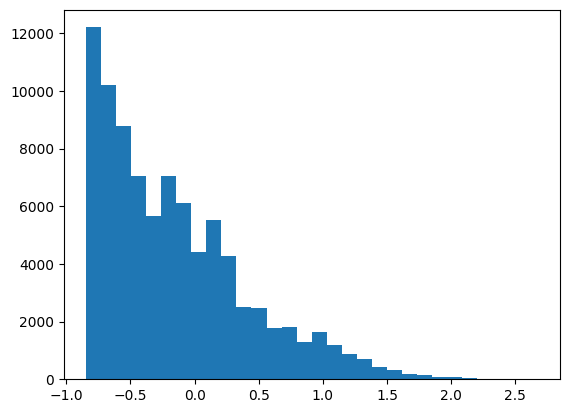

In [75]:
import matplotlib.pyplot as plt  # Importing the plotting library

# Plot a histogram for the 'Average Medicare Allowed Amount' of normal data points
plt.hist(normal_df['Average Medicare Allowed Amount'], bins=30)  # Specify the number of bins for the histogram
plt.show()  # Display the plot

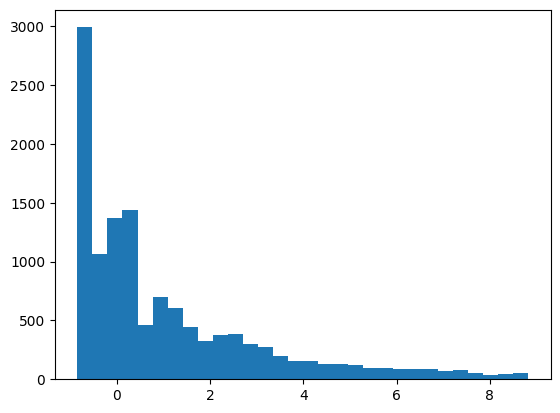

In [76]:
# Plot a histogram for the 'Average Medicare Allowed Amount' of the anomaly data points
plt.hist(anomaly_df['Average Medicare Allowed Amount'], bins=30)  # Specify the number of bins
plt.show()  # Display the histogram

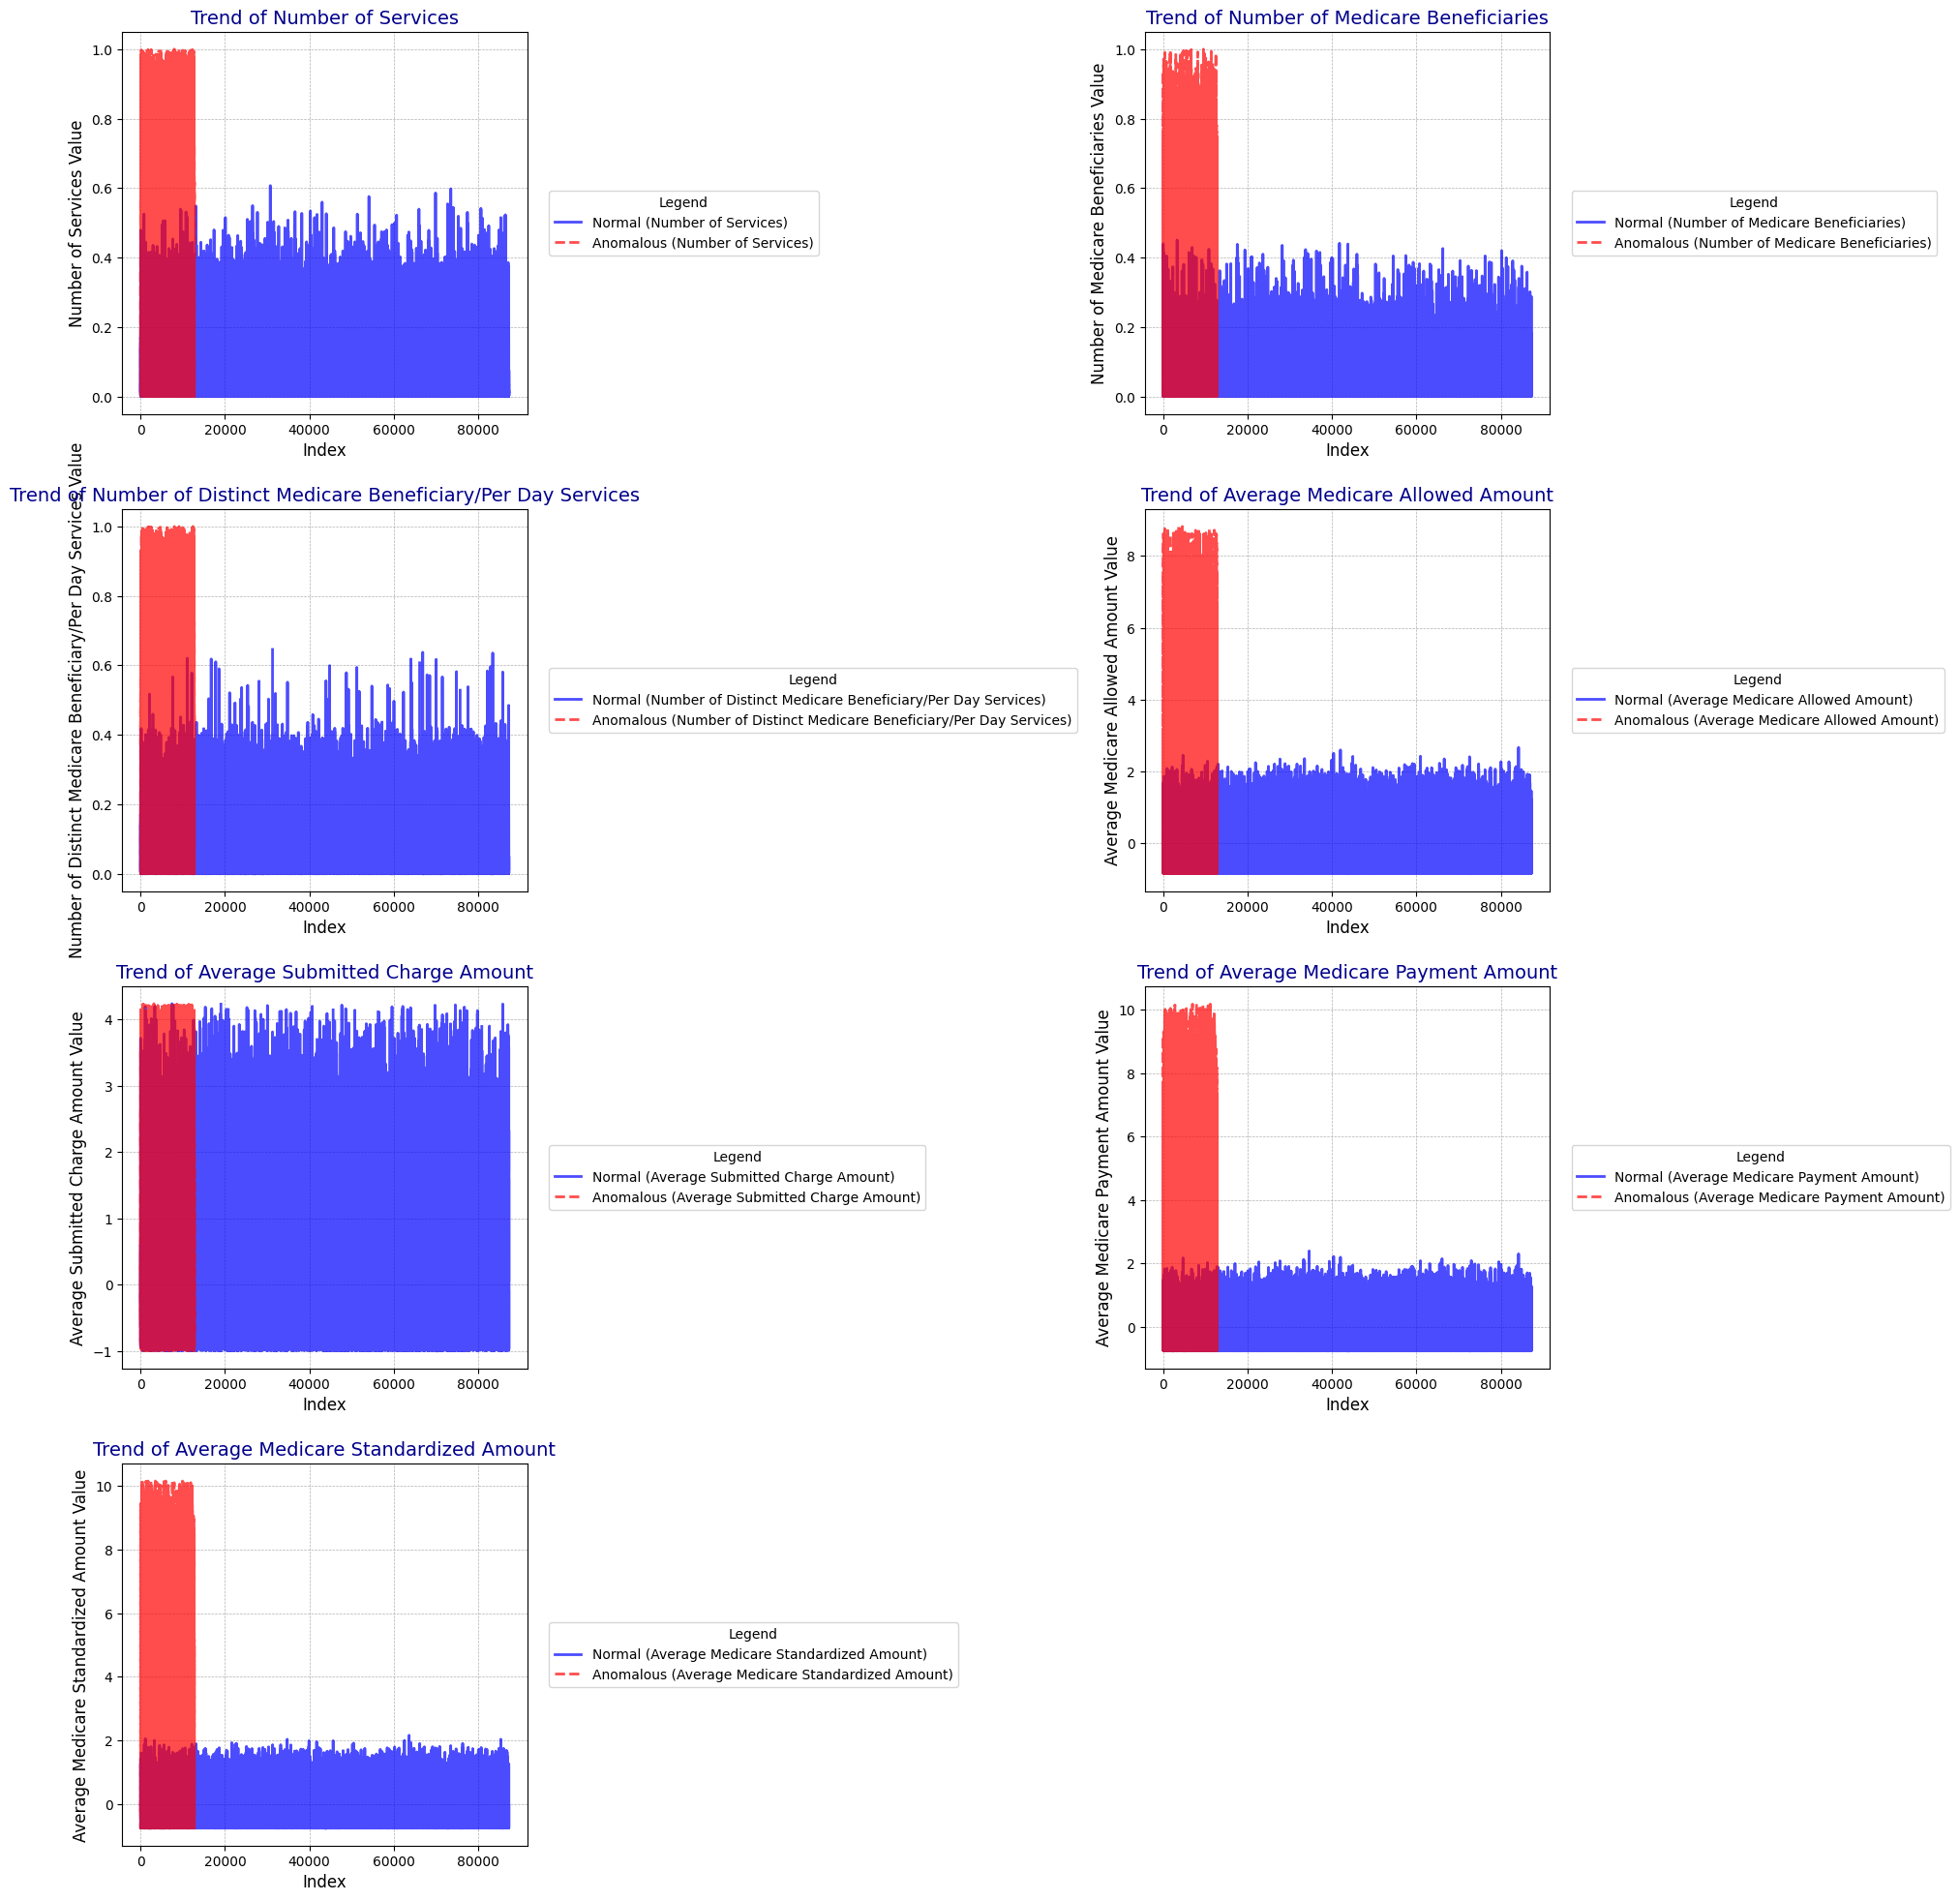

In [77]:
import matplotlib.pyplot as plt  # Importing the plotting library
import math  # Importing math for dynamic grid size calculation

# Define the columns to plot
columns_to_plot = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Dynamically determine the number of rows and columns for the subplots
num_columns = len(columns_to_plot)  # Total number of columns to plot
rows = math.ceil(num_columns / 2)  # Create enough rows for 2 columns per row
cols = 2  # Fixed number of columns per row

# Create a figure with an appropriate size
plt.figure(figsize=(20, rows * 5))

# Loop through each column and plot its values for both normal and anomalous data
for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(rows, cols, i)  # Position the subplot dynamically
    plt.plot(normal_df[col].reset_index(drop=True), label=f'Normal ({col})', linestyle='-', color='blue', linewidth=2, alpha=0.7)  # Plot normal data
    plt.plot(anomaly_df[col].reset_index(drop=True), label=f'Anomalous ({col})', linestyle='--', color='red', linewidth=2, alpha=0.7)  # Plot anomaly data
    plt.title(f"Trend of {col}", fontsize=14, color='darkblue')  # Set the title
    plt.xlabel('Index', fontsize=12, color='black')  # X-axis label
    plt.ylabel(f'{col} Value', fontsize=12, color='black')  # Y-axis label
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid to the plot
    plt.tight_layout(pad=2.0)  # Adjust layout to prevent overlap
    
    # Place the legend box in the right-center with smaller size
    plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.1, title="Legend")  # Adjust legend box position

# Display the plots
plt.show()

## **UMAP**

In [78]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Columns to use for processing (excluding 'anomaly')
columns_to_use = [
    'Number of Services', 'Number of Medicare Beneficiaries', 
    'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 
    'Average Medicare Standardized Amount'
]

# Initialize the imputer to fill missing values with the median
imputer = SimpleImputer(strategy='median')

# Apply the imputer to the selected columns
transformed_df[columns_to_use] = imputer.fit_transform(transformed_df[columns_to_use])

# Initialize the Isolation Forest model
model = IsolationForest(random_state=42)

# Use Isolation Forest to detect anomalies in the selected columns
transformed_df['anomaly'] = model.fit_predict(transformed_df[columns_to_use])

# Map anomaly labels: 1 for normal points, -1 for anomalies
transformed_df['anomaly'] = transformed_df['anomaly'].map({1: 1, -1: -1})

In [79]:
# Initialize UMAP for dimensionality reduction with specified parameters
umap_reducer = umap.UMAP(n_neighbors=30, min_dist=0.05, n_components=2, random_state=42)

# Apply UMAP to the selected columns to reduce dimensions to 2D
umap_embeddings = umap_reducer.fit_transform(transformed_df[columns_to_use])

c:\Users\naman\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [80]:
# Create boolean masks to separate anomalies and normal points
anomalies = transformed_df['anomaly'] == -1
normal = transformed_df['anomaly'] == 1

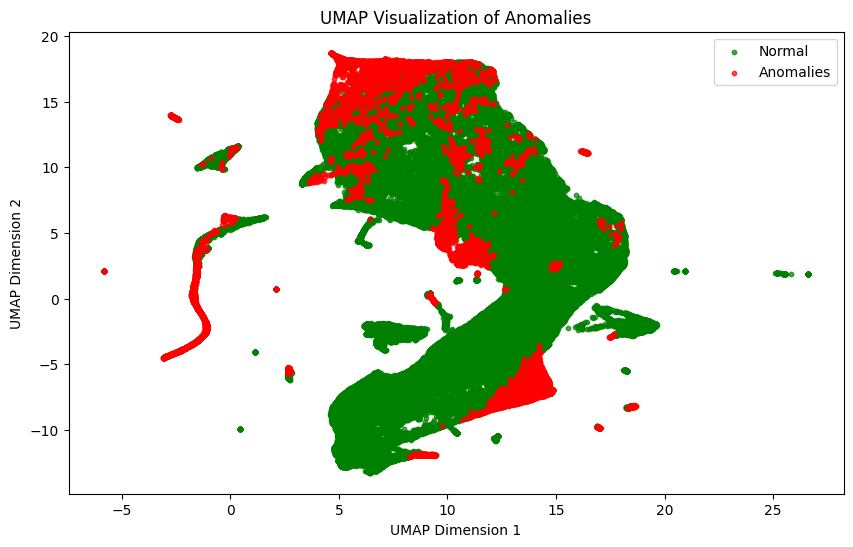

In [81]:
# Create a scatter plot to visualize UMAP results
plt.figure(figsize=(10, 6))

# Plot normal points in green
plt.scatter(umap_embeddings[normal, 0], umap_embeddings[normal, 1], c='green', label='Normal', s=10, alpha=0.7)

# Plot anomalous points in red
plt.scatter(umap_embeddings[anomalies, 0], umap_embeddings[anomalies, 1], c='red', label='Anomalies', s=10, alpha=0.7)

# Add plot title and labels
plt.title('UMAP Visualization of Anomalies')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

# Add a legend to distinguish between normal points and anomalies
plt.legend()

# Display the plot
plt.show()

# **Building Autoencoder**

In [99]:
# Specify the columns to be used for anomaly detection
columns_to_use = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Create a subset of the transformed DataFrame with the selected columns
df = transformed_df[columns_to_use]

In [100]:
# Import necessary libraries and modules

# For splitting datasets into training and testing subsets
from sklearn.model_selection import train_test_split

# For building and training neural network models with Keras
from tensorflow.keras import Sequential  # Simplified model creation using a linear stack of layers
from tensorflow.keras.layers import Dense, Dropout  # Fully connected layers and regularization
from tensorflow.keras.optimizers import Adam  # Optimizer for training neural networks
from tensorflow.keras.layers import Input  # For defining input layers
from tensorflow.keras.models import Model  # For building custom neural network architectures
from tensorflow.keras.callbacks import EarlyStopping  # Stops training early to prevent overfitting

# Other essential libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization

In [101]:
# Split the dataset into training and validation sets
x_train, x_val = train_test_split(df, test_size=0.2, random_state=42)

# Determine the number of input features
input_dim = x_train.shape[1]

# Define the input layer
input_layer = Input(shape=(input_dim,))

# Encoder architecture with Dropout for regularization
encoded = Dense(16, activation='relu')(input_layer)  # First encoder layer
encoded = Dropout(0.2)(encoded)                      # Dropout after first encoder layer
encoded = Dense(8, activation='relu')(encoded)       # Second encoder layer
encoded = Dropout(0.2)(encoded)                      # Dropout after second encoder layer

# Bottleneck layer for reduced representation
bottleneck = Dense(4, activation='relu')(encoded)

# Decoder architecture with Dropout for regularization
decoded = Dense(8, activation='relu')(bottleneck)    # First decoder layer
decoded = Dropout(0.2)(decoded)                      # Dropout after first decoder layer
decoded = Dense(16, activation='relu')(decoded)      # Second decoder layer
decoded = Dropout(0.2)(decoded)                      # Dropout after second decoder layer

# Define the output layer
output_layer = Dense(input_dim, activation='linear')(decoded)

# Build and compile the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

In [102]:
# Build the model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

In [103]:
# Summary of the model
autoencoder.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 603 (2.36 KB)

 Trainable params: 603 (2.36 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',          # Track the validation loss during training
    patience=5,                  # Halt training if no improvement for 5 consecutive epochs
    restore_best_weights=True    # Reload the model weights from the epoch with the lowest validation loss
)

In [105]:
# Train the autoencoder model
history = autoencoder.fit(
    x_train, x_train,         # Input and target data are identical
    epochs=100,               # Maximum number of epochs; early stopping will prevent overfitting
    batch_size=256,           # Number of samples per gradient update
    validation_data=(x_val, x_val),  # Use validation set to monitor performance
    callbacks=[early_stopping],     # Apply early stopping during training
    verbose=1                 # Display training progress and metrics
)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4919 - val_loss: 0.1795
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2316 - val_loss: 0.1737
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1986 - val_loss: 0.1725
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1866 - val_loss: 0.1726
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1797 - val_loss: 0.1742
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1826 - val_loss: 0.1716
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1765 - val_loss: 0.1763
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1714 - val_loss: 0.1761
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1673 - val_loss: 0.1756
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1629 - val_loss: 0.1701
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1652 - val_loss: 0.1787
Epoch 12/100
313/313 ━━━━━━━━━━━━━━━━━━━━

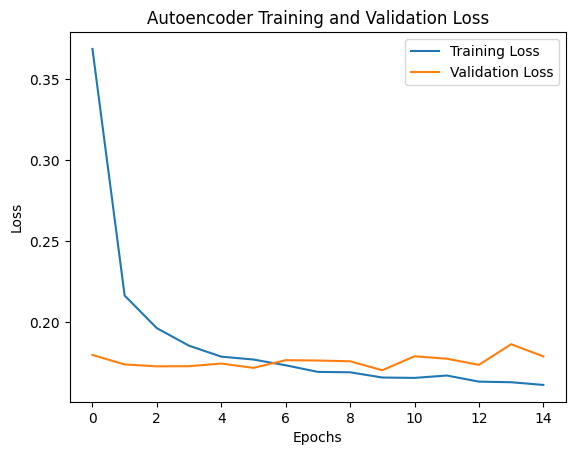

In [106]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')  # Training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Validation loss over epochs
plt.title('Autoencoder Training and Validation Loss')  # Title of the plot
plt.xlabel('Epochs')  # Label for the x-axis
plt.ylabel('Loss')  # Label for the y-axis
plt.legend()  # Display legend to differentiate lines
plt.show()  # Render the plot

In [107]:
# Reconstruct the input data using the trained autoencoder
reconstructed_data = autoencoder.predict(df)

# Calculate the reconstruction error (mean squared error for each sample)
reconstruction_error = np.mean(np.square(df - reconstructed_data), axis=1)

3125/3125 ━━━━━━━━━━━━━━━━━━━━ 3s 788us/step


In [109]:
# Add reconstruction error to the DataFrame
df.loc[:, 'reconstruction_error'] = reconstruction_error

# Define the anomaly threshold using the 95th percentile of reconstruction errors
threshold = np.percentile(reconstruction_error, 95)
print(f"Anomaly Threshold (95th percentile): {threshold:.4f}")

# Detect anomalies by comparing reconstruction error to the threshold
anomalies = reconstruction_error > threshold
print(f"Total anomalies detected: {np.sum(anomalies)}")

# Add anomaly labels to the DataFrame using .loc
df.loc[:, 'anomaly'] = anomalies

Anomaly Threshold (95th percentile): 0.4436
Total anomalies detected: 5000


In [112]:
# Get 20 rows from the DataFrame
df.sample(20)

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,reconstruction_error,anomaly
40081,0.444332,0.429150,0.444332,-0.601795,-0.730645,-0.489018,-0.488184,0.158776,False
49779,0.019231,0.018219,0.019231,2.127508,0.703339,1.888965,1.758093,0.079243,False
30464,0.088057,0.071862,0.088057,-0.102010,-0.421867,-0.206064,-0.163244,0.059215,False
52736,0.008097,0.007085,0.008097,-0.731969,-0.913451,-0.628160,-0.632528,0.142027,False
75652,0.134615,0.133603,0.134615,0.291342,2.404450,0.180231,0.187132,0.318064,False
4301,0.137652,0.041498,0.137652,1.472270,2.969451,1.306411,1.308964,0.481218,True
61104,0.028340,0.028340,0.028340,-0.685354,-0.882417,-0.576282,-0.562434,0.128006,False
46781,0.028340,0.028340,0.028340,-0.293447,0.520166,-0.263513,-0.249263,0.058185,False
33932,0.005061,0.004049,0.005061,0.068535,2.682262,0.057491,0.037923,0.499511,True
55451,0.016194,0.007085,0.016194,-0.603342,0.165229,-0.485141,-0.489933,0.109829,False


In [113]:
# Filter rows that are identified as anomalies
df_a = df[df['anomaly'] == True]

# Display the top anomalies sorted by reconstruction error
print("\nAnomalies with the highest reconstruction error:")
print(df_a.sort_values(by='reconstruction_error', ascending=False).head())


Anomalies with the highest reconstruction error:
       Number of Services  Number of Medicare Beneficiaries  \
16749            0.001012                          0.001012   
17876            0.001012                          0.001012   
76547            0.005061                          0.005061   
5920             0.004049                          0.004049   
23791            0.018219                          0.018219   

       Number of Distinct Medicare Beneficiary/Per Day Services  \
16749                                           0.001012          
17876                                           0.001012          
76547                                           0.005061          
5920                                            0.004049          
23791                                           0.018219          

       Average Medicare Allowed Amount  Average Submitted Charge Amount  \
16749                        -0.224037                         -0.30673   
17876             

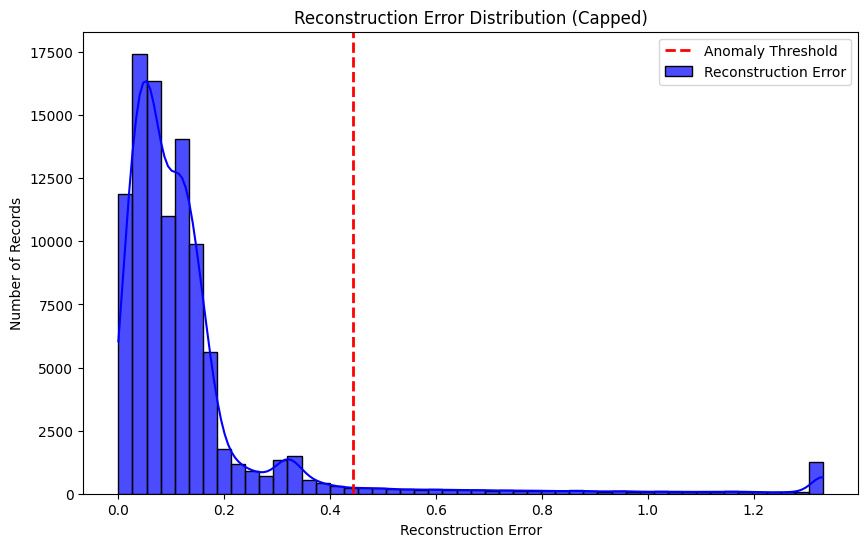

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved Plot for Reconstruction Error Distribution
plt.figure(figsize=(10, 6))

# Cap reconstruction errors for better visualization
capped_errors = np.clip(reconstruction_error, a_min=None, a_max=threshold * 3)

# Plot histogram with capped values
sns.histplot(capped_errors, bins=50, kde=True, color='blue', alpha=0.7, label='Reconstruction Error')

# Add a vertical line indicating the anomaly threshold
plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Anomaly Threshold')

# Customize plot appearance
plt.title("Reconstruction Error Distribution (Capped)")
plt.xlabel("Reconstruction Error")
plt.ylabel("Number of Records")
plt.legend()

# Display the plot
plt.show()

In [117]:
df_a

,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,reconstruction_error,anomaly
22,0.264170,0.243927,0.264170,-0.077007,2.992309,-0.094286,-0.092279,0.745150,True
38,0.018219,0.018219,0.018219,-0.053477,2.792955,-0.096488,-0.077635,0.612683,True
52,0.027328,0.024291,0.026316,0.642122,3.274648,0.562341,0.517688,0.692453,True
54,0.013158,0.013158,0.013158,0.502754,4.047774,0.285690,0.158629,1.300565,True
72,0.031377,0.029352,0.031377,5.604996,-0.306730,4.926301,4.873019,1.076059,True
...,...,...,...,...,...,...,...,...,...
99864,0.043522,0.041498,0.043522,-0.224037,-0.306730,10.046039,-0.237683,9.983225,True
99885,0.021255,0.006073,0.021255,1.173970,3.667635,0.907109,1.082986,0.921296,True
99905,0.006073,0.006073,0.006073,5.460838,-0.306730,4.341739,4.756469,0.976340,True
99946,0.013158,0.009109,0.013158,1.053723,3.650245,0.934295,0.894245,0.908353,True


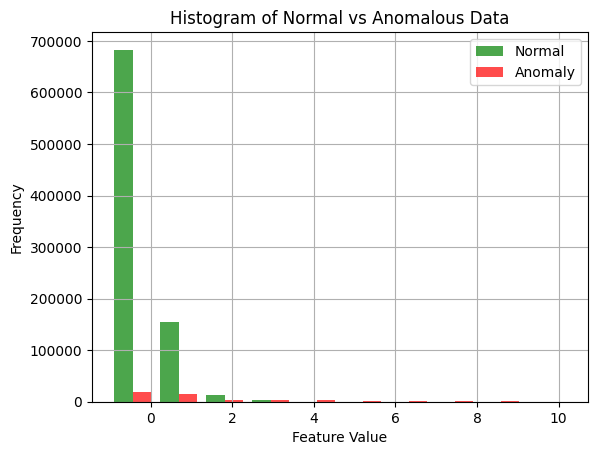

In [118]:
# Plot histograms for normal and anomalous data
plt.hist([df[df['anomaly'] == False].values.flatten(), df[df['anomaly'] == True].values.flatten()],
         bins=10, color=['green', 'red'], alpha=0.7, label=['Normal', 'Anomaly'])

# Customize the appearance of the plot
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Histogram of Normal vs Anomalous Data')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()